<a href="https://colab.research.google.com/github/ingridibagon/womakerscode/blob/main/IngridDesafioBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Final: Previsão de Bullying**

Sobre o conjunto de dados
O Global School-Based Student Health Survey (GSHS) é uma pesquisa escolar que usa um questionário autoaplicável para obter dados sobre o comportamento de saúde dos jovens e fatores de proteção relacionados às principais causas de morbidade e mortalidade.

A pesquisa foi realizada na Argentina em 2018. Um total de 56.981 alunos participaram.
A taxa de resposta da escola foi de 86%, a taxa de resposta do aluno foi de 74% e a taxa de resposta geral foi de 63%.

Sobre o desenvolvimento de um modelo de previsão de bullying
A partir do GHSH, foram selecionadas as perguntas da pesquisa relacionadas ao bullying. Isto com o objetivo de desenvolver um modelo que permita preveni-la.
Alguns dos indicadores de bullying têm sido relacionados a sentimentos de solidão, falta de amigos íntimos, má comunicação com os pais, ausência nas aulas. (por exemplo, Nansel et al. Comportamentos de bullying entre jovens americanos: Prevalência e associação com ajustamento psicossocial)
Da mesma forma, jovens identificados por agressores como abaixo do peso, acima do peso e obesos foram vítimas de bullying.

Para responder esse desafio: A base de dados contém as seguintes informações:

    • record : código identificador
    • Bullied_on_school_property_in_past_12_months: Sofreu bullying na propriedade da escola nos últimos 12 meses
    • Bullied_not_on_school_property_in_past_12_months: sofreu bullying fora da propriedade da escola nos últimos 12_meses
    • Cyber_bullied_in_past_12_months: Cyberbullying nos últimos 12 meses
    • Custom_Age: Idade
    • Sex: Sexo
    • Physically_attacked: Ataque físico
    • Physical_fighting: Briga Física
    • Felt_lonely: Sentiu-se sozinho
    • Close_friends: Amigos próximos
    • Miss_school_no_permission: Faltam à escola sem permissão
    • Other_students_kind_and_helpful: Outros alunos gentis e prestativos
    • Parents_understand_problems: Os pais entendem os problemas
    • Most_of_the_time_or_always_felt_lonely: Na maioria das vezes ou sempre se sentiu sozinho
    • Missed_classes_or_school_without_permission: Perdeu aulas ou escola sem permissão
    • Were_underweight: Estava abaixo do peso
    • Were_overweight: Estava acima do peso
    • Were_obese: Estava obeso


**Importante:** Para rodar este notebook no google colab basta cargar o arquivo "Bullying_2018.csv" clicando no icone da pasta e depois na folha com a zeta

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [111]:
df = pd.read_csv('Bullying_2018.csv', delimiter=';')
df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

Aparentemente não temos valores nullos porém o .head() mostra que temos valores em branco. Vou fazer uma copia do df para substituir os valores em branco por nan deixando o df original intacto caso precise usar ele posteriormente.

In [113]:
dfb=df.copy()

In [114]:
# Tratando o caso de dados em branco adicionando NaN
dfb.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [115]:
dfb.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

As colunas

Were_underweight                                    20929
Were_overweight                                     20929
Were_obese                                          20929

tem uma porcetagem de dados em branco muito alta 37%.

#**Análise dos dados**

Calcule a matriz de correlação para todas as variáveis numéricas e Identifique as correlações mais fortes e mais fracas

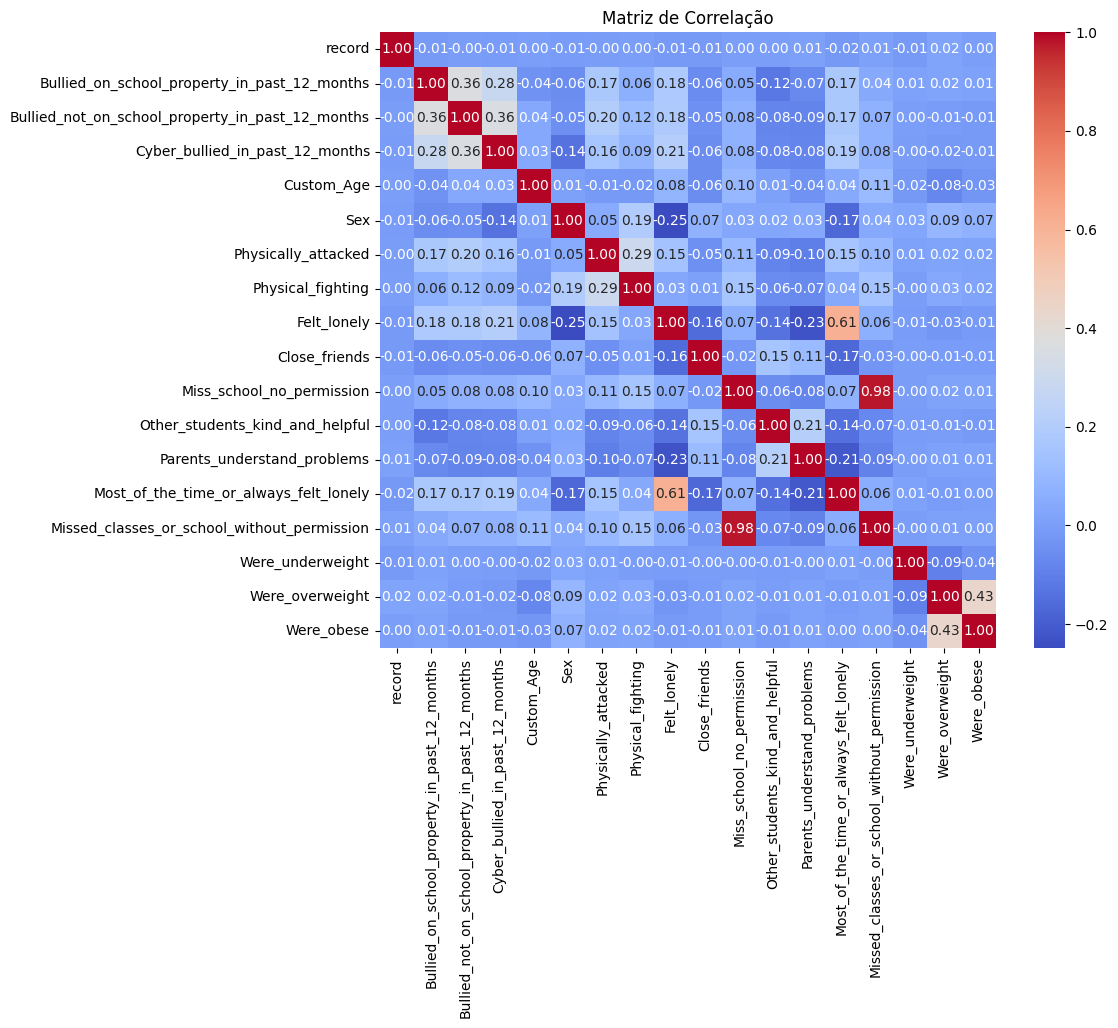

Correlações Mais Fortes:
 (Miss_school_no_permission, Missed_classes_or_school_without_permission)                            0.975999
(Felt_lonely, Most_of_the_time_or_always_felt_lonely)                                               0.610802
(Were_obese, Were_overweight)                                                                       0.434725
(Bullied_on_school_property_in_past_12_months, Bullied_not_on_school_property_in_past_12_months)    0.361820
(Bullied_not_on_school_property_in_past_12_months, Cyber_bullied_in_past_12_months)                 0.358394
(Physically_attacked, Physical_fighting)                                                            0.292765
(Bullied_on_school_property_in_past_12_months, Cyber_bullied_in_past_12_months)                     0.279406
(Other_students_kind_and_helpful, Parents_understand_problems)                                      0.211028
(Felt_lonely, Cyber_bullied_in_past_12_months)                                                      0.

In [116]:
df_numeric = df.copy()

# Definindo as colunas binárias que serão convertidas de 'Yes'/'No' para 1/0
binary_columns = [
    'Bullied_not_on_school_property_in_past_12_months',
    'Bullied_on_school_property_in_past_12_months',
    'Cyber_bullied_in_past_12_months',
    'Most_of_the_time_or_always_felt_lonely',
    'Missed_classes_or_school_without_permission',
    'Were_underweight',
    'Were_overweight',
    'Were_obese'
]

# Percorre cada coluna e substitui os valores categóricos por números
for col in binary_columns:
    df_numeric[col] = df_numeric[col].map({'Yes': 1, 'No': 0})

# Converter 'Male' para 1 e 'Female' para 0
df_numeric['Sex'] = df_numeric['Sex'].map({'Male': 1, 'Female': 0})

# Convertendo valores categóricos em ordinais
ordinal_columns = {
    'Felt_lonely': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Always': 4},
    'Miss_school_no_permission': {'0 days': 0, '1 to 2 days': 1, '3 to 5 days': 2, '6 to 9 days': 3, '10 or more days': 4},
    'Other_students_kind_and_helpful': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Always': 4},
    'Parents_understand_problems': {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Always': 4},
    'Physically_attacked': {'0 times': 0, '1 time': 1, '2 or 3 times': 2, '4 or 5 times': 3, '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7},
    'Physical_fighting': {'0 times': 0, '1 time': 1, '2 or 3 times': 2, '4 or 5 times': 3, '6 or 7 times': 4, '8 or 9 times': 5, '10 or 11 times': 6, '12 or more times': 7}

    }

# Percorre cada coluna e aplica o mapeamento, substituindo os valores categóricos por números
for col, mapping in ordinal_columns.items():
    df_numeric[col] = df_numeric[col].map(mapping)

# Extraindo valores numéricos de colunas com valores textuais
df_numeric['Custom_Age'] = df_numeric['Custom_Age'].str.extract('(\d+)').astype(float)
df_numeric['Close_friends'] = df_numeric['Close_friends'].str.extract('(\d+)').astype(float)

# Calculando a matriz de correlação
correlacao = df_numeric.corr(method='kendall')

# matriz ajustada
correlacao_estilizada = correlacao.style.background_gradient(cmap='coolwarm')

# Salvando a matriz estilizada como uma imagem
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação')
plt.show()

# Removendo as correlações da diagonal (correlações de 1)
correlacao_sem_diagonal = correlacao.mask(np.eye(correlacao.shape[0], dtype=bool))

# Ordenando as correlações da mais forte para a mais fraca
correlacoes_ordenadas = correlacao_sem_diagonal.unstack().sort_values(kind="quicksort", ascending=False)

# Convertendo os índices das correlações para conjuntos imutáveis (frozenset) para evitar duplicatas
correlacoes_ordenadas.index = correlacoes_ordenadas.index.map(frozenset)

# Removendo linhas duplicadas e nulos
correlacoes_ordenadas = correlacoes_ordenadas.drop_duplicates().dropna()

# Selecionar as correlações mais fortes e mais fracas
correlacoes_mais_fortes = correlacoes_ordenadas.head(10)
correlacoes_mais_fracas = correlacoes_ordenadas.tail(10)

print("Correlações Mais Fortes:\n",correlacoes_mais_fortes)
print("\nCorrelações Mais Fracas:\n",correlacoes_mais_fracas)

In [117]:
df_numeric.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                           11603
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

Faça a análise exploratória dos dados categóricos, calcule a moda e as variáveis e utilize recursos visuais, utilize o teste qui-quadrado para avaliar a análise de correspondência.

In [118]:
df_numeric.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1.0,1.0,NaN,13.0,0.0,0.0,0.0,4.0,2.0,4.0,0.0,4.0,1.0,1.0,NaN,NaN,NaN
1,2,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,0.0,NaN,NaN,NaN
2,3,0.0,0.0,0.0,14.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,16.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,13.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,3.0,0.0,0.0,NaN,NaN,NaN


In [119]:
df_numeric.describe()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
count,56981.000000,55742.000000,56492.000000,56410.000000,56873.000000,56445.000000,56741.000000,56713.000000,56615.000000,55905.000000,45378.000000,55422.000000,54608.000000,56615.000000,55117.000000,36052.000000,36052.000000,36052.000000
mean,28535.389832,0.213537,0.216473,0.216221,14.905403,0.479812,0.361573,0.496447,1.335423,2.488990,0.390387,2.265653,2.024264,0.168560,0.298692,0.020332,0.296100,0.073644
std,16479.971553,0.409807,0.411844,0.411670,1.358115,0.499597,1.079432,1.211089,1.189118,0.881294,0.987518,1.207566,1.483298,0.374366,0.457689,0.141134,0.456542,0.261194
min,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14263.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28522.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42804.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,3.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,57095.000000,1.000000,1.000000,1.000000,18.000000,1.000000,7.000000,7.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df['Sex'].value_counts(normalize='True')

Sex
Female    0.515295
Male      0.475299
          0.009407
Name: proportion, dtype: float64

<ipython-input-121-5f7e853f3fc7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(['Meninas','Meninos'])


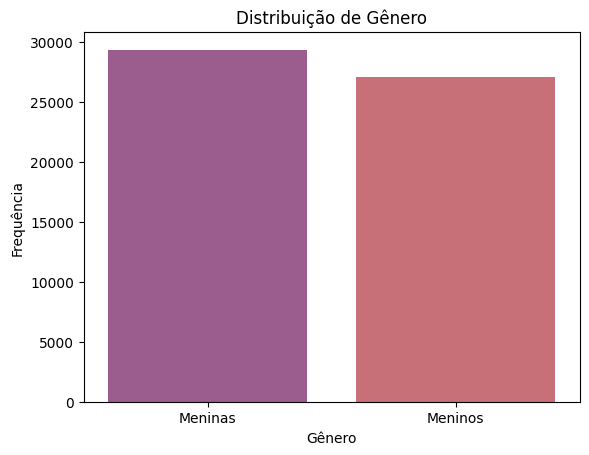

In [121]:
# Distribuição de genero na base
sns.set_palette("tab20b_r")
g1=sns.countplot(data=df_numeric, x='Sex', hue='Sex', legend=False)
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Distribuição de Gênero')
g1.set_xticklabels(['Meninas','Meninos'])
plt.show()

In [122]:
df.groupby('Bullied_on_school_property_in_past_12_months')[['Sex']].value_counts()

Bullied_on_school_property_in_past_12_months  Sex   
                                              Male        605
                                              Female      578
                                                           56
No                                            Female    22023
                                              Male      21471
                                                          345
Yes                                           Female     6761
                                              Male       5007
                                                          135
Name: count, dtype: int64

<ipython-input-123-00f321b8a357>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(['Não','Sim'])


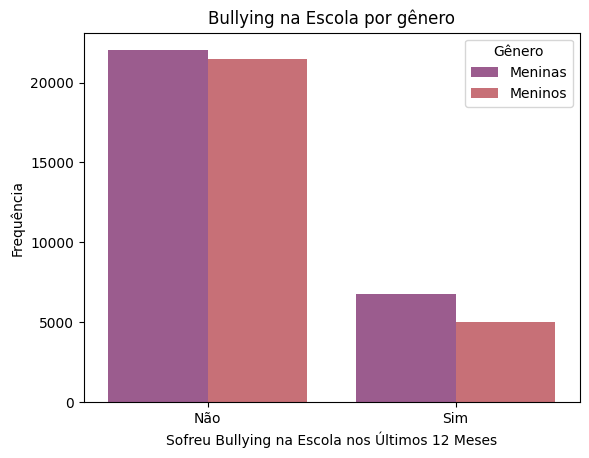

In [123]:
# Distribuição de 'Bullied_on_school_property_in_past_12_months'
g2=sns.countplot(data=df_numeric, x='Bullied_on_school_property_in_past_12_months', hue='Sex')

#g2=sns.countplot(data=df_numeric, x='Bullied_on_school_property_in_past_12_months', palette=['#ff7f0e', '#1f77b4'])
plt.xlabel('Sofreu Bullying na Escola nos Últimos 12 Meses')
plt.ylabel('Frequência')
plt.title('Bullying na Escola por gênero')
g2.set_xticklabels(['Não','Sim'])

plt.legend(title='Gênero',loc='upper right', labels=['Meninas', 'Meninos'])
plt.show()

In [124]:
df.groupby('Bullied_not_on_school_property_in_past_12_months')[['Sex']].value_counts()

Bullied_not_on_school_property_in_past_12_months  Sex   
                                                  Male        231
                                                  Female      222
                                                               36
No                                                Female    22256
                                                  Male      21636
                                                              371
Yes                                               Female     6884
                                                  Male       5216
                                                              129
Name: count, dtype: int64

<ipython-input-125-3be6205e1c2b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(['Não','Sim'])


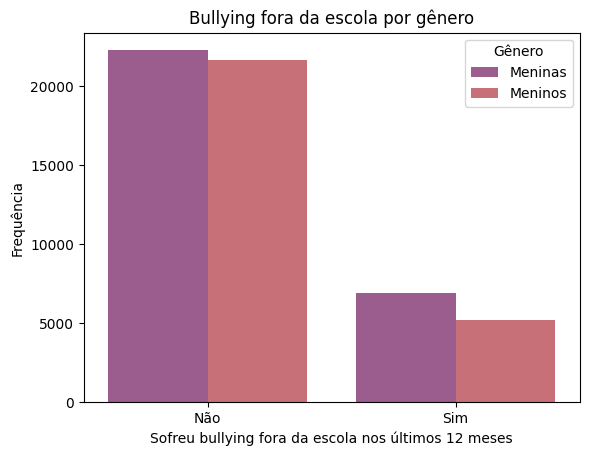

In [125]:
# Distribuição de 'Bullied_on_school_property_in_past_12_months'
g2=sns.countplot(data=df_numeric, x='Bullied_not_on_school_property_in_past_12_months', hue='Sex')

#g2=sns.countplot(data=df_numeric, x='Bullied_on_school_property_in_past_12_months', palette=['#ff7f0e', '#1f77b4'])
plt.xlabel('Sofreu bullying fora da escola nos últimos 12 meses')
plt.ylabel('Frequência')
plt.title('Bullying fora da escola por gênero')
g2.set_xticklabels(['Não','Sim'])

plt.legend(title='Gênero',loc='upper right', labels=['Meninas', 'Meninos'])
plt.show()

In [126]:
df.groupby('Cyber_bullied_in_past_12_months')[['Sex']].value_counts()

Cyber_bullied_in_past_12_months  Sex   
                                 Male        293
                                 Female      233
                                              45
No                               Male      22586
                                 Female    21256
                                             371
Yes                              Female     7873
                                 Male       4204
                                             120
Name: count, dtype: int64

<ipython-input-127-b042b949b4aa>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(['Não','Sim'])


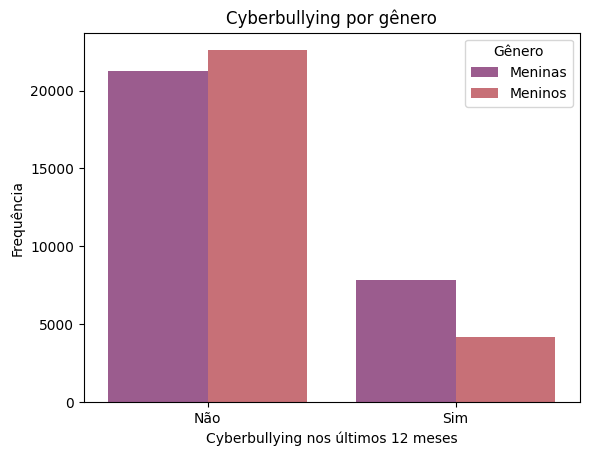

In [127]:
# Distribuição de 'Bullied_on_school_property_in_past_12_months'
g2=sns.countplot(data=df_numeric, x='Cyber_bullied_in_past_12_months', hue='Sex')

#g2=sns.countplot(data=df_numeric, x='Bullied_on_school_property_in_past_12_months', palette=['#ff7f0e', '#1f77b4'])
plt.xlabel('Cyberbullying nos últimos 12 meses')
plt.ylabel('Frequência')
plt.title('Cyberbullying por gênero')
g2.set_xticklabels(['Não','Sim'])

plt.legend(title='Gênero',loc='upper right', labels=['Meninas', 'Meninos'])
plt.show()

In [128]:
# Criando uma tabela de contingência entre 'Sex' e 'Bullied_on_school_property_in_past_12_months':

# Tabela de contingência
contingency_table = pd.crosstab(df['Sex'], df['Bullied_on_school_property_in_past_12_months'],normalize='index')
print(contingency_table)


Bullied_on_school_property_in_past_12_months                  No       Yes
Sex                                                                       
                                              0.104478  0.643657  0.251866
Female                                        0.019685  0.750051  0.230264
Male                                          0.022339  0.792785  0.184876


Entre as meninas 23% disseram sofrer bullying na escola nos últimos 12 meses. Já entre os meninos essa porcentagem é apenas 18%.

In [129]:
# Tabela de contingência sem dados vazios
contingency_table = pd.crosstab(df_numeric['Sex'], df_numeric['Bullied_on_school_property_in_past_12_months'],normalize='index')
print(contingency_table)

Bullied_on_school_property_in_past_12_months       0.0       1.0
Sex                                                             
0.0                                           0.765113  0.234887
1.0                                           0.810900  0.189100


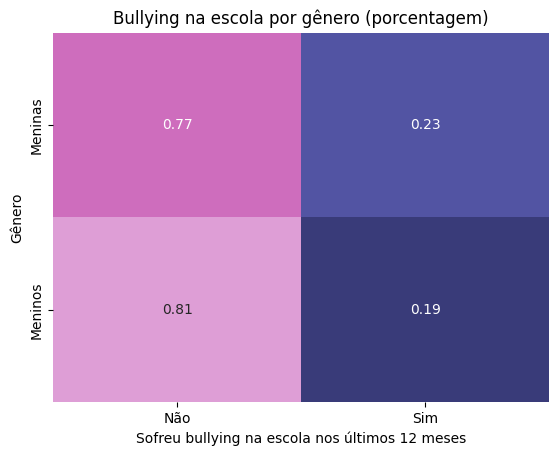

In [130]:
g3=sns.heatmap(contingency_table, annot=True , cmap='tab20b',cbar=False, fmt='.2g')
plt.xlabel('Sofreu bullying na escola nos últimos 12 meses')
plt.ylabel('Gênero')
plt.title('Bullying na escola por gênero (porcentagem)')
g3.set_xticklabels(['Não','Sim'])
g3.set_yticklabels(['Meninas','Meninos'])

plt.show()


In [131]:
 #Criando uma tabela de contingência entre 'Sex' e 'Bullied_not_on_school_property_in_past_12_months':

# Tabela de contingência
contingency_table = pd.crosstab(df['Sex'], df['Bullied_not_on_school_property_in_past_12_months'],normalize='index')
print(contingency_table)

Bullied_not_on_school_property_in_past_12_months                  No       Yes
Sex                                                                           
                                                  0.067164  0.692164  0.240672
Female                                            0.007561  0.757987  0.234453
Male                                              0.008529  0.798878  0.192593


In [132]:
#Criando uma tabela de contingência entre 'Sex' e 'Cyber_bullied_in_past_12_months':

# Tabela de contingência
contingency_table = pd.crosstab(df['Sex'], df['Cyber_bullied_in_past_12_months'],normalize='index')
print(contingency_table)

Cyber_bullied_in_past_12_months                  No       Yes
Sex                                                          
                                 0.083955  0.692164  0.223881
Female                           0.007935  0.723929  0.268136
Male                             0.010819  0.833955  0.155227


<ipython-input-133-bb2c5e775d37>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g4.set_xticklabels(['Meninas','Meninos'])


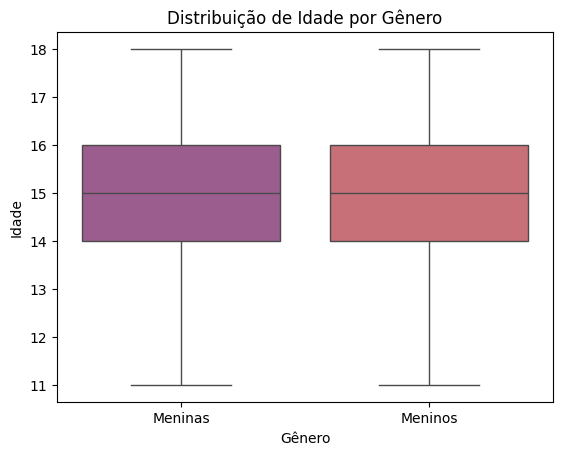

In [133]:
g4=sns.boxplot(data=df_numeric, x='Sex', y='Custom_Age', hue='Sex', legend=False)
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.title('Distribuição de Idade por Gênero')
g4.set_xticklabels(['Meninas','Meninos'])
plt.show()



In [134]:
# Análise de 'Sentiu-se sozinho' ou 'Felt_lonely'


In [135]:
#Filtrando quem respondeu sim a algum dos tipos de bullying
yes=dfb.loc[(df['Bullied_on_school_property_in_past_12_months']=='Yes') | (df['Bullied_not_on_school_property_in_past_12_months']=='Yes') | (df['Cyber_bullied_in_past_12_months']=='Yes')]


In [136]:
yes.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,NaN,NaN,NaN
11,12,Yes,Yes,Yes,13 years old,Female,12 or more times,1 time,Sometimes,3 or more,0 days,Never,Always,No,No,NaN,NaN,NaN
18,19,Yes,Yes,Yes,14 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Rarely,Most of the time,No,No,NaN,NaN,NaN
22,23,No,No,Yes,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,Yes,No,No,No,No


In [137]:
yes.shape

(22812, 18)

In [138]:
#Filtrando quem respondeu Nao em todas as colunas relacionadas com Bullying
No=dfb.loc[(df['Bullied_on_school_property_in_past_12_months']=='No') & (df['Bullied_not_on_school_property_in_past_12_months']=='No') & (df['Cyber_bullied_in_past_12_months']=='No')]


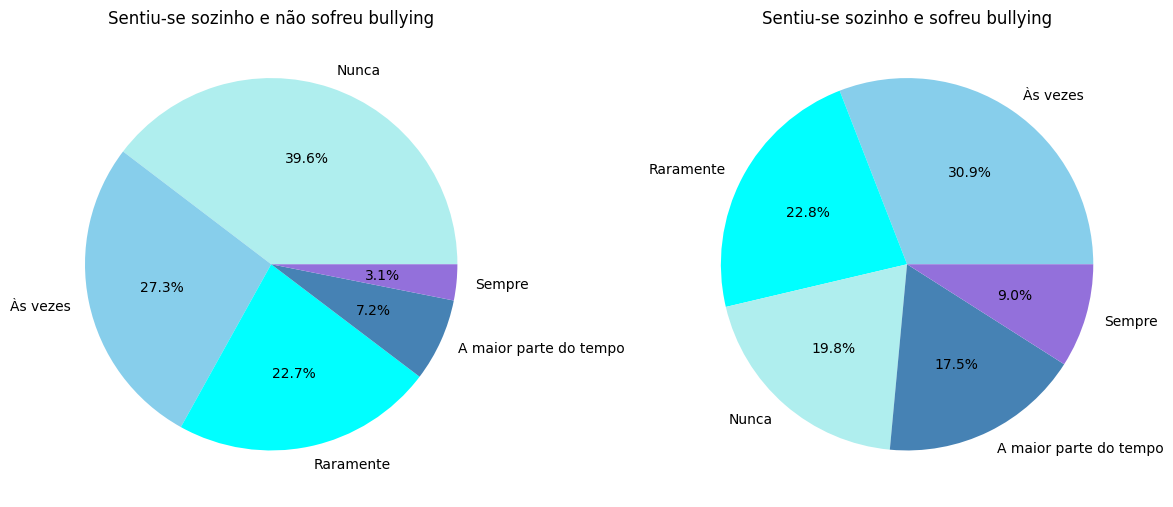

In [139]:
# Análise de 'Se sentir sozinho' ou 'Felt_lonely'
f, axes = plt.subplots(1, 2,figsize=(12,6))
colors1=['paleturquoise','skyblue','cyan', 'steelblue', 'mediumpurple']
labels1=['Nunca','Às vezes', 'Raramente','A maior parte do tempo', 'Sempre']
No['Felt_lonely'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], labels=labels1,colors=colors1)
axes[0].set_ylabel(' ')
axes[0].set_title('Sentiu-se sozinho e não sofreu bullying')

colors2=['skyblue','cyan', 'paleturquoise','steelblue', 'mediumpurple']
labels2=['Às vezes', 'Raramente','Nunca','A maior parte do tempo', 'Sempre']
yes['Felt_lonely'].value_counts().plot.pie(autopct='%1.1f%%', labels=labels2, colors=colors2, ax=axes[1])
axes[1].set_title('Sentiu-se sozinho e sofreu bullying')
axes[1].set_ylabel(' ')
f.tight_layout()
plt.show()

A maioria dos estudantes que relataram sofrer algum tipo de bullying respoderam se sentir sozinhos às vezes.
A porcentagem de que se sente sozinho sempre também é maior entre quem sofre bullying.

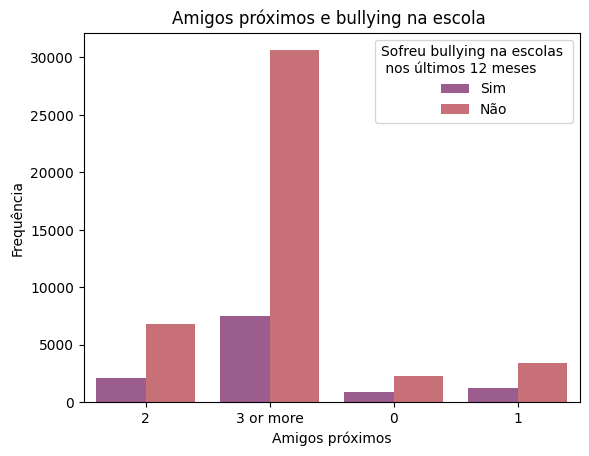

In [140]:
# Relação entre 'Felt_lonely', e 'Close_friends'
sns.countplot(data=dfb, x='Close_friends', hue='Bullied_on_school_property_in_past_12_months')
plt.title('Amigos próximos e bullying na escola ')
plt.xlabel('Amigos próximos')
plt.ylabel('Frequência')
plt.legend(title='Sofreu bullying na escolas \n nos últimos 12 meses',loc='upper right', labels=['Sim', 'Não'])
plt.show()

Quem sofreu bullying na escola como que nao sofreu tem em sua maioria 3 amigos ou mais

In [141]:
# Calculando a moda para cada coluna
moda = dfb.mode().iloc[0]
Moda=pd.DataFrame()
Moda['Moda']=moda



In [142]:
Moda

,Moda
record,1
Bullied_on_school_property_in_past_12_months,No
Bullied_not_on_school_property_in_past_12_months,No
Cyber_bullied_in_past_12_months,No
Custom_Age,14 years old
Sex,Female
Physically_attacked,0 times
Physical_fighting,0 times
Felt_lonely,Never
Close_friends,3 or more


Plote histogramas e boxplots para cada tipo de bullying separado por gênero e idade.

<ipython-input-143-ce85c8f81c1e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Meninas','Meninos'])


<Figure size 640x480 with 0 Axes>

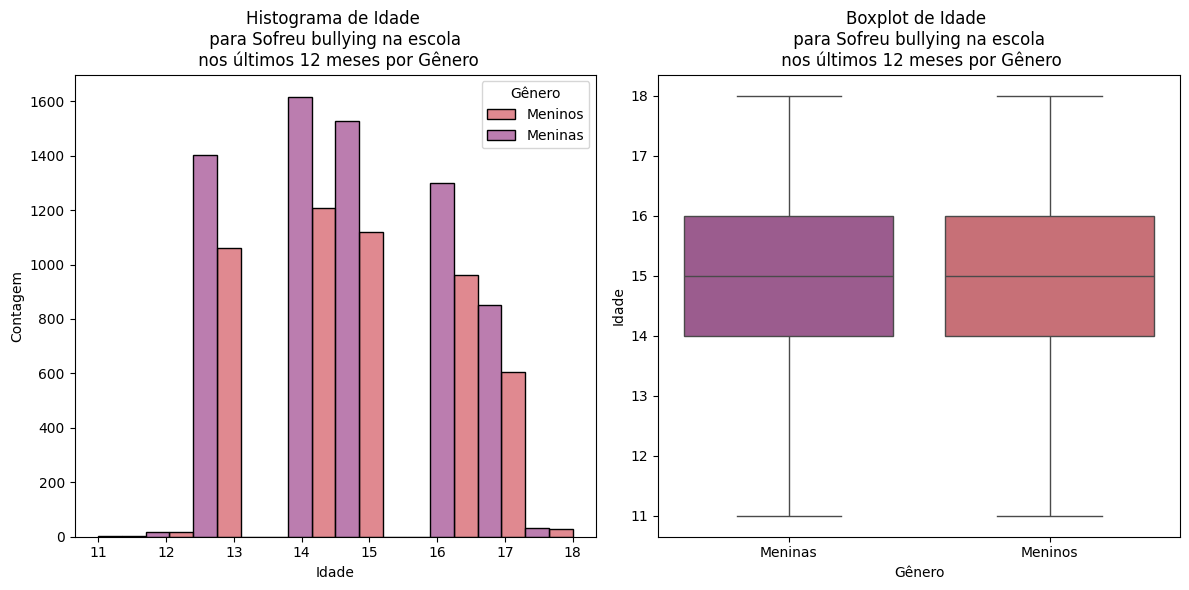

<ipython-input-143-ce85c8f81c1e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Meninas','Meninos'])


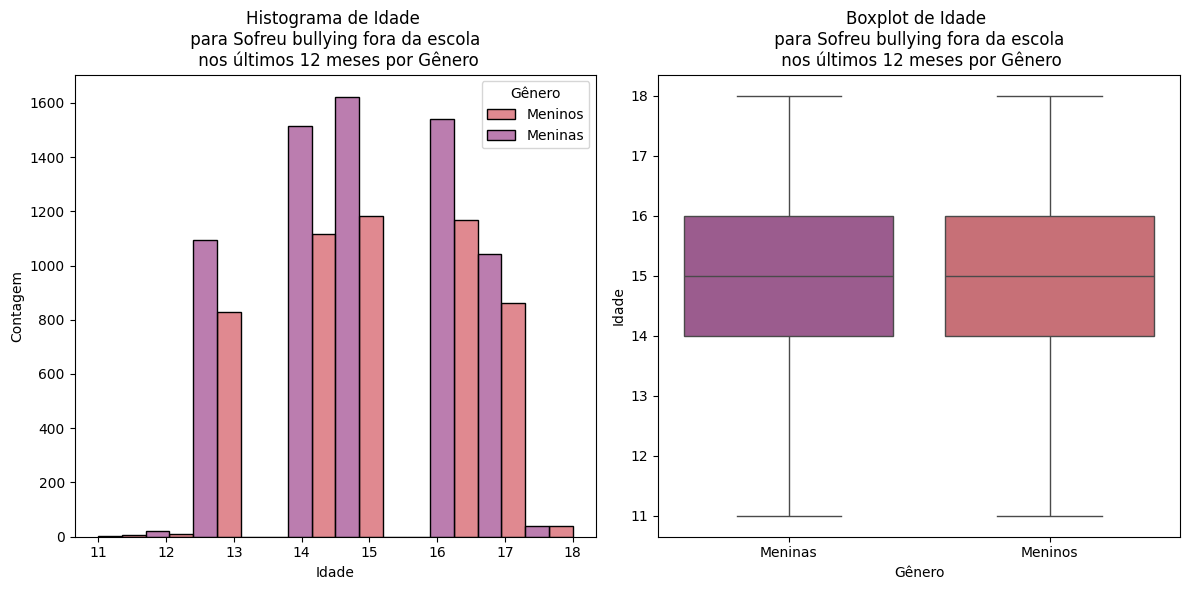

<ipython-input-143-ce85c8f81c1e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Meninas','Meninos'])


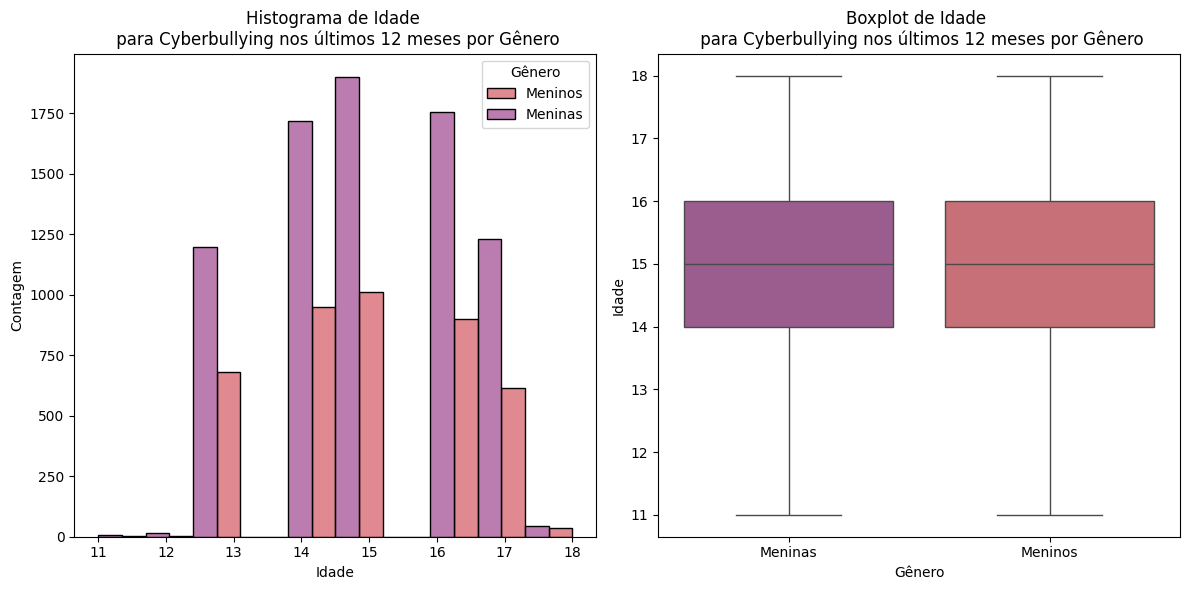

In [143]:
# histogramas e boxplots para cada tipo de bullying, separado por gênero e idade
tipos_bullying = ['Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months']
tipos_PT=['Sofreu bullying na escola \n nos últimos 12 meses',
          'Sofreu bullying fora da escola \n nos últimos 12 meses',
          'Cyberbullying nos últimos 12 meses']
i=0
plt.subplots_adjust(right=1,wspace=3, hspace=1)
for tipo in tipos_bullying:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_numeric[df_numeric[tipo] == 1], x='Custom_Age', hue='Sex',  multiple='dodge', kde=False, bins=10,legend=False)
    plt.title(f'Histograma de Idade \n para {tipos_PT[i]} por Gênero')
    plt.xlabel('Idade')
    plt.ylabel('Contagem')
    plt.legend(title='Gênero',loc='upper right', labels=['Meninos', 'Meninas'])
    # Boxplot
    plt.subplot(1, 2, 2)
    g=sns.boxplot(x='Sex', y='Custom_Age', data=df_numeric[df_numeric[tipo] == 1], hue='Sex',  legend=False)
    plt.title(f'Boxplot de Idade \n para {tipos_PT[i]} por Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Idade')
    g.set_xticklabels(['Meninas','Meninos'])
    i=i+1

    plt.tight_layout()
    plt.show()

#**Modelo de Regressão Logística**

In [144]:
#localizando as colunas que tem sim como resposta 'Yes' para algum dos tipos de bullying
bullying=df[['Bullied_on_school_property_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','Cyber_bullied_in_past_12_months']].loc[(df['Bullied_on_school_property_in_past_12_months']=='Yes') | (df['Bullied_not_on_school_property_in_past_12_months']=='Yes') | (df['Cyber_bullied_in_past_12_months']=='Yes')]

In [145]:
#substituindo o valor em branco por 'No' que é o valor mais frequente nas colunas dos tipos de bullying
bullying.replace(r'^\s*$', 'No', regex=True, inplace=True)

In [146]:
a=bullying.value_counts()
a=a.to_frame()
a

count
Bullied_on_school_property_in_past_12_months Bullied_not_on_school_property_in_past_12_months Cyber_bullied_in_past_12_months       
No                                           No                                               Yes                               4594
Yes                                          No                                               No                                4407
No                                           Yes                                              No                                3858
Yes                                          Yes                                              Yes                               3564
No                                           Yes                                              Yes                               2457
Yes                                          Yes                                              No                                2350
                                             No                                               Yes                               1582

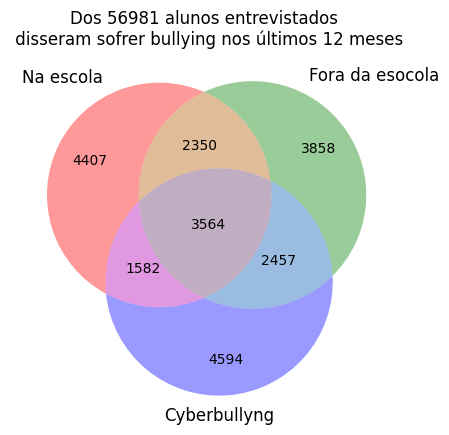

In [147]:
#Fazendo um diagrama de venn
#importando o modulo
from matplotlib_venn import venn3, venn3_circles


# definindo o diagrama usando os valores do .value_counts venn diagram
v = venn3(subsets=(4407, 3858, 2350, 4594, 1582, 2457, 3564),
          set_labels=('Na escola', 'Fora da esocola', 'Cyberbullyng'))



# assign title
plt.title("Dos 56981 alunos entrevistados \n disseram sofrer bullying nos últimos 12 meses")
plt.show()

Como tem alunos em mais de uma categoria nao é possivel fazer um modelo de classificaçao usando como categorias os três tipos de bullying.

Construa um modelo de regressão logística para prever a probabilidade de um indivíduo sofrer bullying na escola, considere como target: Bullied_on_school_property_in_past_12_months que representa 1 caso o indivíduo tenha sofrido bullying na escola nos últimos 12 meses, 0 caso contrário.

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import statsmodels.api as sm

In [149]:
# Verificar os nomes das colunas
df_numeric.columns


Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')

In [150]:
#fazer uma copia do dataframe numerico
df_model = df_numeric.copy()

In [151]:
# Remover valores nulos
df_model.dropna(inplace=True)

In [152]:
df_model.shape

(27261, 18)

In [153]:

# Separar variáveis independentes e dependente

X = df_model.drop(['record', 'Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months' ], axis=1)  # Tirando a columna record e a coluna alvo
y = df_model['Bullied_on_school_property_in_past_12_months']  # Select the correct target variable




In [154]:
X.shape

(27261, 14)

In [155]:
y.shape

(27261,)

Dividir os dados em conjuntos de treinamento e teste:

In [156]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [157]:
#reescalar as variaveis usando o StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Construir e treinar o modelo de regressão logística:

In [158]:
# Inicializar o modelo
log_reg = LogisticRegression()

# Treinar o modelo
log_reg.fit(X_train, y_train)


LogisticRegression()

In [159]:
y_pred = log_reg.predict(X_test)

Análise as variáveis mais relevantes no modelo.


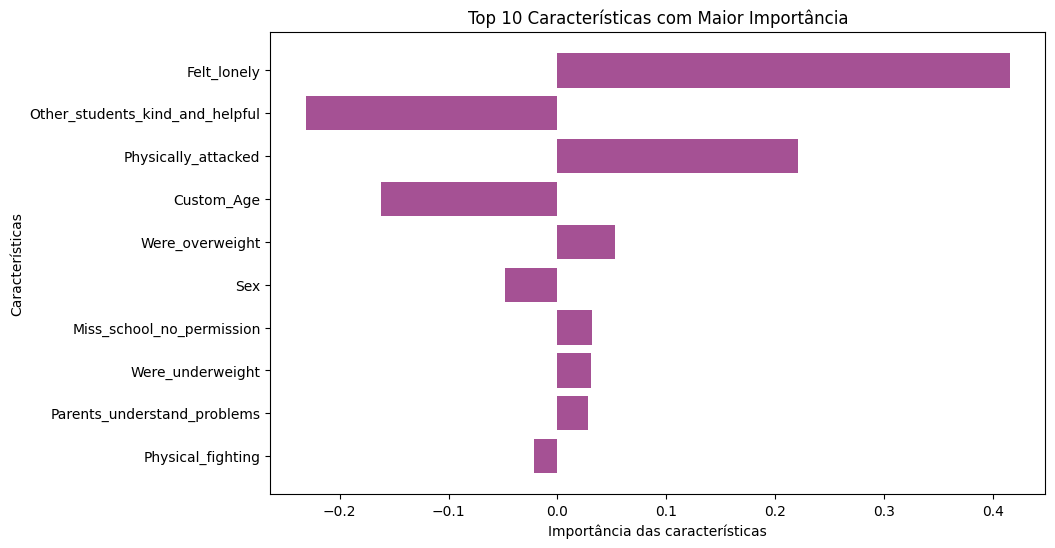

In [160]:
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Avalie a performance do modelo usando métricas como Acurácia, Precisão, Recall e plote a matriz de confusão

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      6480
         1.0       0.55      0.06      0.11      1699

    accuracy                           0.79      8179
   macro avg       0.67      0.53      0.50      8179
weighted avg       0.75      0.79      0.72      8179



In [162]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.7945959163711945
Precisão: 0.5477386934673367
Recall: 0.06415538552089464


In [163]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6390   90]
 [1590  109]]


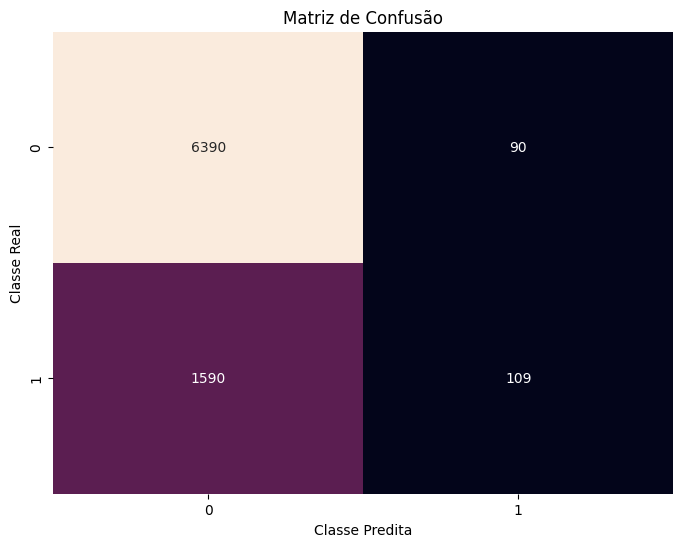

In [164]:
#Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo com todas as variáveis não é muito bom, classificando os casos positivos de bullying na escola. Vamos fazer um novo modelo deletando as colunas com mais dados vazios:

Were_underweight
Were_overweight
Were_obese

E balanceando a variável alvo para ver se o modelo performa melhor
           

In [165]:
df_model2 = df_numeric.copy()

In [166]:
df_model2.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'Were_underweight',
       'Were_overweight', 'Were_obese'],
      dtype='object')

In [167]:
df_model2.drop(['Were_underweight',
       'Were_overweight', 'Were_obese'], axis=1, inplace=True)

In [168]:
df_model2.dropna(inplace=True)

In [169]:
df_model2.shape

(41880, 15)

In [170]:
df_model2['Bullied_on_school_property_in_past_12_months'].value_counts()

Bullied_on_school_property_in_past_12_months
0.0    33198
1.0     8682
Name: count, dtype: int64

In [171]:
contagem_minoritaria = df_model2[df_model2['Bullied_on_school_property_in_past_12_months'] ==1 ].shape[0]
contagem_maioritaria = df_model2[df_model2['Bullied_on_school_property_in_past_12_months'] ==0 ].shape[0]
print("Contagem da classe minoritária (Sofreu Bullying na escola=1):", contagem_minoritaria)
print("Contagem da classe maioritária (Sofreu Bullying na escola=0):", contagem_maioritaria)

Contagem da classe minoritária (Sofreu Bullying na escola=1): 8682
Contagem da classe maioritária (Sofreu Bullying na escola=0): 33198


In [172]:
# Calculando o número de amostras a serem subamostradas
undersample_size = contagem_minoritaria

# Realizando o undersampling
minority_train= df_model2[df_model2['Bullied_on_school_property_in_past_12_months'] ==1 ].copy()

majority_train = df_model2[df_model2['Bullied_on_school_property_in_past_12_months'] ==0 ].copy()

### seleciona aleatoriamente as observacoes da classe majoritaria
undersampled_majority = majority_train.sample(n=undersample_size, replace=False, random_state=42)

# Combinando as amostras da classe minoritária e subamostrada da classe majoritária
undersampled_train_features = pd.concat([undersampled_majority, minority_train], axis=0)
undersampled_train_labels = pd.concat([pd.Series([0]*undersample_size), pd.Series([1]*contagem_minoritaria)], axis=0)

# Verificando o novo balanceamento
print("Contagem de amostras após o undersampling:")
undersampled_train_labels.value_counts()

Contagem de amostras após o undersampling:


0    8682
1    8682
Name: count, dtype: int64

In [173]:
X2 = undersampled_train_features.drop(['record', 'Bullied_on_school_property_in_past_12_months','Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months'], axis=1)  # Tirando a columna record e a coluna alvo
y2 = undersampled_train_features['Bullied_on_school_property_in_past_12_months']

In [174]:
# Dividir os dados em conjuntos de treinamento e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [175]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000)

In [176]:
y2_pred = log_reg.predict(X2_test)

In [177]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      2582
         1.0       0.65      0.59      0.62      2628

    accuracy                           0.63      5210
   macro avg       0.64      0.64      0.63      5210
weighted avg       0.64      0.63      0.63      5210



In [178]:
# Calcular métricas
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.6349328214971209
Precisão: 0.6513761467889908
Recall: 0.5943683409436834


In [179]:
cm2 = confusion_matrix(y2_test, y2_pred)
print(cm2)

[[1746  836]
 [1066 1562]]


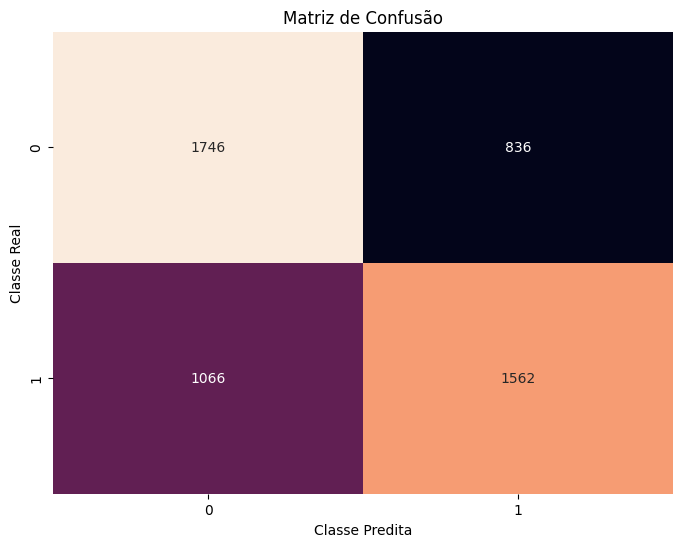

In [180]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Acuracia piorou porém o recall melhorou , ou seja dado que a pessoa sofreu bullying na escola, conseguimos acertar melhor com o modelo que ela sofreu bullying na escola

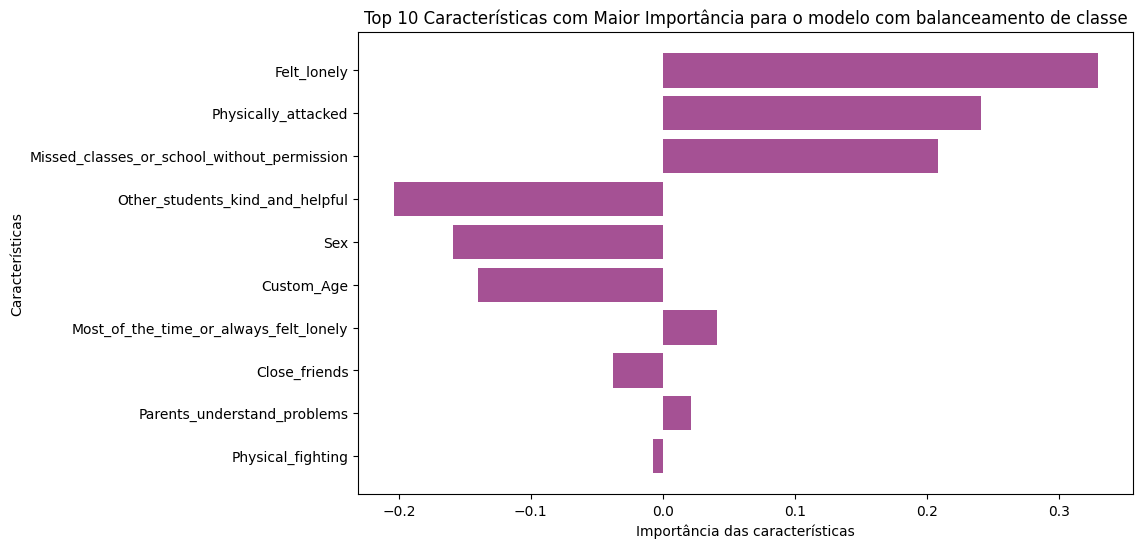

In [181]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância para o modelo com balanceamento de classe')
plt.show()